In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://alternative-fuels-observatory.ec.europa  .eu/general-information/news/eafo-analysis-trends-ev-charging-infrastructure-across-europe"

response = requests.get(url)


soup = BeautifulSoup(response.content, 'html.parser')


rows = soup.find_all('tr', class_='ecl-table__row')


headers = []
header_row = soup.find('tr')
if header_row:
    headers = [th.text.strip() for th in header_row.find_all('th')]


data = []
for row in rows:
    cols = [col.text.strip() for col in row.find_all('td')]
    if cols:
        data.append(cols)


df = pd.DataFrame(data, columns=headers if headers else None)



df.to_csv('scraped_rows.csv', index=False)

In [5]:
import pandas as pd

df = pd.read_csv('../data/scraped_NoC_data.csv', header=None)  
df.columns = df.iloc[1]
df = df[2:]
df.reset_index(drop=True, inplace=True)


In [6]:
df.head()

1,Country,Recharging Power / Recharging Point,Recharging Power / Total Light Duty PEV fleet,Total Recharging Power Output (kW),Recharging Points,Light Duty PEV Fleet
0,Austria,"30,74","2,93",680332,22133,232140
1,Belgium,"27,51","3,07",1442176,52429,470303
2,Bulgaria,"50,44","13,17",111870,2218,8495
3,Croatia,"42,57","6,44",58655,1378,9114
4,Cyprus,"20,03","2,51",7450,372,2969


In [9]:
df.rename({'Recharging Power / Recharging Point': 'Power per station (kW)', 'Recharging Power / Total Light Duty PEV fleet': 'Power available per fleet'}, axis=1, inplace=True)


In [10]:
df['Power per station (kW)'] = df['Power per station (kW)'].str.replace(',', '.').astype(float)
df['Power available per fleet'] = df['Power available per fleet'].str.replace(',', '.').astype(float)

In [11]:
df = df.astype({'Country': 'str', 'Total Recharging Power Output (kW)': 'int32', 'Recharging Points': 'int32', 'Light Duty PEV Fleet': 'int32'}, copy=False)

In [12]:
dfn = df.convert_dtypes()

In [13]:
dfn.dtypes

1
Country                               string[python]
Power per station (kW)                       Float64
Power available per fleet                    Float64
Total Recharging Power Output (kW)             Int32
Recharging Points                              Int32
Light Duty PEV Fleet                           Int32
dtype: object

In [14]:
df.columns.name = 'Index'

In [15]:
df.columns

Index(['Country', 'Power per station (kW)', 'Power available per fleet',
       'Total Recharging Power Output (kW)', 'Recharging Points',
       'Light Duty PEV Fleet'],
      dtype='object', name='Index')

In [16]:
df

Index,Country,Power per station (kW),Power available per fleet,Total Recharging Power Output (kW),Recharging Points,Light Duty PEV Fleet
0,Austria,30.74,2.93,680332,22133,232140
1,Belgium,27.51,3.07,1442176,52429,470303
2,Bulgaria,50.44,13.17,111870,2218,8495
3,Croatia,42.57,6.44,58655,1378,9114
4,Cyprus,20.03,2.51,7450,372,2969
5,Czech Republic,39.30,5.16,192270,4892,37297
6,Denmark,34.60,3.05,891885,25779,292196
7,Estonia,51.81,4.64,29014,560,6248
8,Finland,42.18,2.68,539419,12789,201018
9,France,30.39,2.27,3875424,127530,1708826


In [17]:
df.describe()

Index,Power per station (kW),Power available per fleet,Total Recharging Power Output (kW),Recharging Points,Light Duty PEV Fleet
count,33.000000,33.000000,3.300000e+01,33.000000,3.300000e+01
mean,35.657576,3.283636,7.837177e+05,24812.696970,3.521511e+05
std,9.462883,2.316402,1.217636e+06,40478.878197,5.917291e+05
min,11.440000,0.140000,1.155000e+03,101.000000,7.590000e+02
25%,30.740000,2.050000,7.749400e+04,2133.000000,1.666100e+04
50%,36.230000,2.680000,1.922700e+05,4892.000000,9.954200e+04
75%,40.680000,4.330000,9.736310e+05,25779.000000,4.096770e+05
max,59.150000,13.170000,5.321694e+06,154219.000000,2.592722e+06


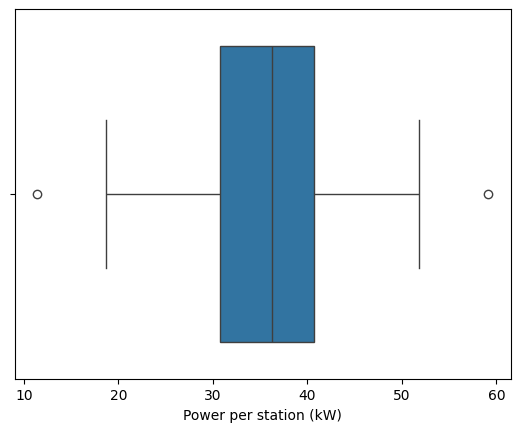

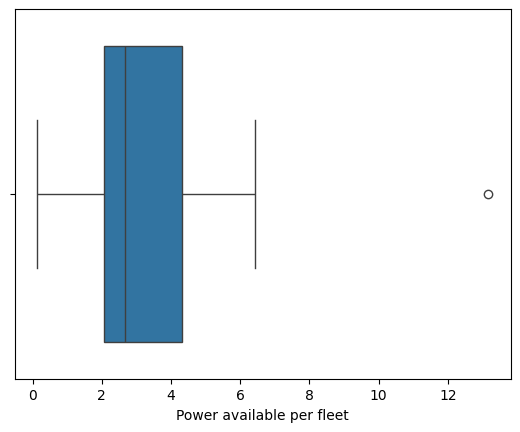

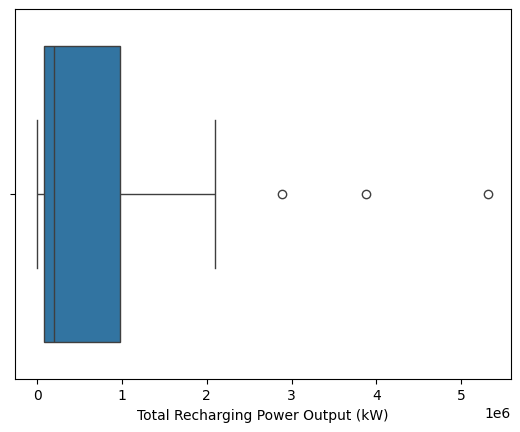

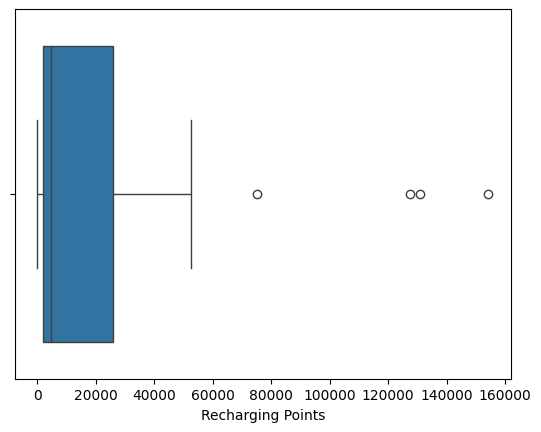

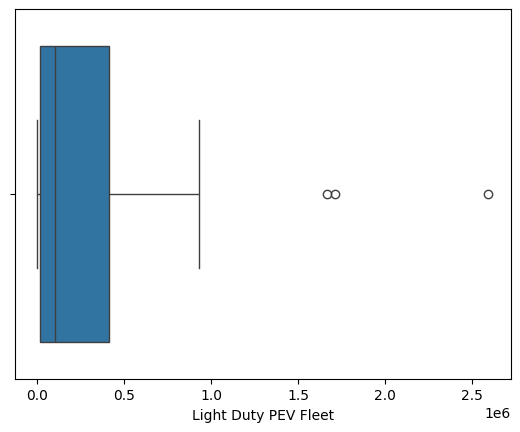

In [19]:
# plot boxplot for each column
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns[1:]:
    sns.boxplot(x=df[col])
    plt.show()

C:\Users\nick_\AppData\Local\Temp\ipykernel_20664\161711195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


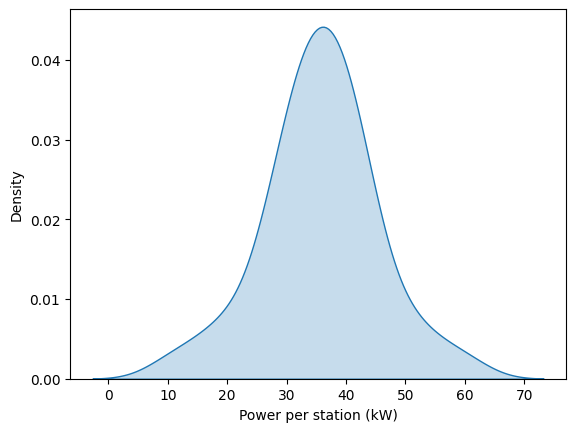

C:\Users\nick_\AppData\Local\Temp\ipykernel_20664\161711195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


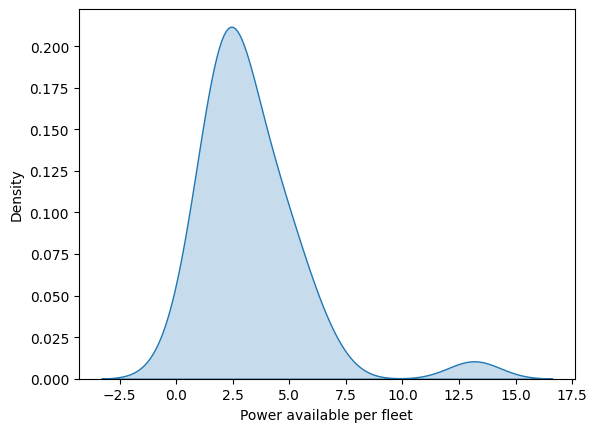

C:\Users\nick_\AppData\Local\Temp\ipykernel_20664\161711195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


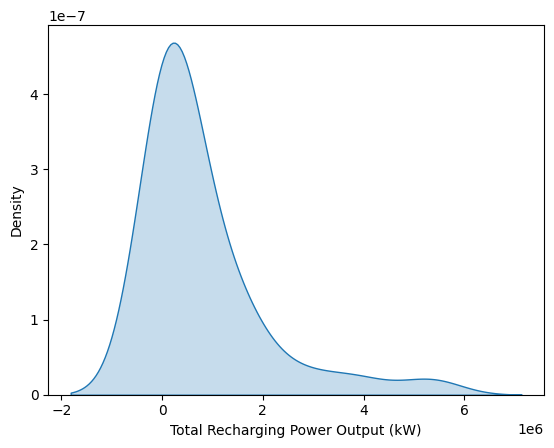

C:\Users\nick_\AppData\Local\Temp\ipykernel_20664\161711195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


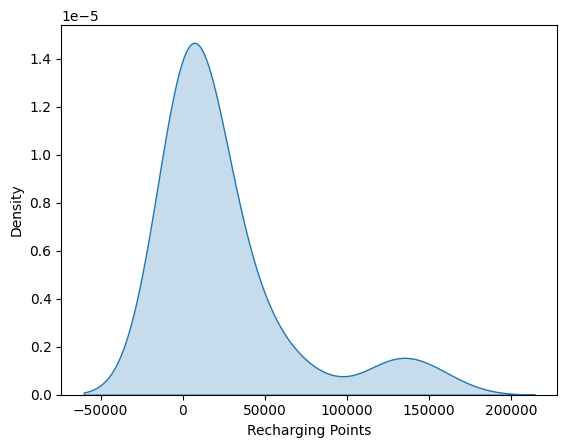

C:\Users\nick_\AppData\Local\Temp\ipykernel_20664\161711195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


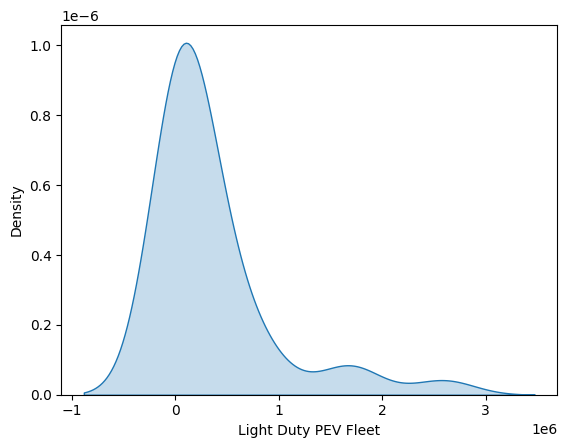

In [21]:
# plot kde for each column
for col in df.columns[1:]:
    sns.kdeplot(df[col], shade=True)
    plt.show()

In [ ]:
import numpy as np

def get_outlier_indices_IQR_method(data:np.array) -> np.array:
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = np.where((data < lower_bound) | (data > upper_bound))

    return outliers


def preprocess_NoC(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = df.iloc[1]
    df.columns.name = 'Index'

    df = df[2:]
    df.reset_index(drop=True, inplace=True)
    df.rename({'Recharging Power / Recharging Point': 'Power per station (kW)', 'Recharging Power / Total Light Duty PEV fleet': 'Power available per fleet'}, axis=1, inplace=True)
    
    df['Power per station (kW)'] = df['Power per station (kW)'].str.replace(',', '.').astype(float)
    df['Power available per fleet'] = df['Power available per fleet'].str.replace(',', '.').astype(float)
    df = df.astype({'Country': 'str', 'Total Recharging Power Output (kW)': 'int32', 'Recharging Points': 'int32', 'Light Duty PEV Fleet': 'int32'}, copy=False)


    print("NaN in NoC dataframe: ", df.isnull().sum().sum())
    print("Number of duplicates in NoC dataframe: ", df.duplicated().sum())
    print("\nSome outlier examples:")
    print("Power per station (kW): ", df.loc[get_outlier_indices_IQR_method(df['Power per station (kW)']), 'Country'].values)
    print("Power available per fleet: ", df.loc[get_outlier_indices_IQR_method(df['Power available per fleet']), 'Country'].values)
    return df


In [79]:
df = pd.read_csv('../data/scraped_NoC_data.csv', header=None)  

In [80]:
df = preprocess_NoC(df)

NaN in NoC dataframe:  0
Number of duplicates in NoC dataframe:  0

Some outlier examples:
Power per station (kW):  ['Malta' 'Norway']
Power available per fleet:  ['Bulgaria']


In [44]:
df = df.copy()
df.columns = df.iloc[1]
df.columns.name = 'Index'
df = df[2:]
df.reset_index(drop=True, inplace=True)
df.head()

Index,Country,Recharging Power / Recharging Point,Recharging Power / Total Light Duty PEV fleet,Total Recharging Power Output (kW),Recharging Points,Light Duty PEV Fleet
0,Austria,"30,74","2,93",680332,22133,232140
1,Belgium,"27,51","3,07",1442176,52429,470303
2,Bulgaria,"50,44","13,17",111870,2218,8495
3,Croatia,"42,57","6,44",58655,1378,9114
4,Cyprus,"20,03","2,51",7450,372,2969


In [35]:
# show rows with nan
df[df.isnull().any(axis=1)]

1,Country,Power per station (kW),Power available per fleet,Total Recharging Power Output (kW),Recharging Points,Light Duty PEV Fleet


In [29]:
df = pd.read_csv('../data/scraped_NoC_data.csv', header=None)  

preprocess_NoC(df)

NaN in NoC dataframe:  1
Country                               0
Power per station (kW)                0
Power available per fleet             0
Total Recharging Power Output (kW)    0
Recharging Points                     0
Light Duty PEV Fleet                  0
dtype: int64
Number of duplicates in NoC dataframe:  0
Outlier countries for power per station (kW):  20     Malta
22    Norway
Name: Country, dtype: object


1,Country,Power per station (kW),Power available per fleet,Total Recharging Power Output (kW),Recharging Points,Light Duty PEV Fleet
0,Austria,30.74,2.93,680332,22133,232140
1,Belgium,27.51,3.07,1442176,52429,470303
2,Bulgaria,50.44,13.17,111870,2218,8495
3,Croatia,42.57,6.44,58655,1378,9114
4,Cyprus,20.03,2.51,7450,372,2969
5,Czech Republic,39.30,5.16,192270,4892,37297
6,Denmark,34.60,3.05,891885,25779,292196
7,Estonia,51.81,4.64,29014,560,6248
8,Finland,42.18,2.68,539419,12789,201018
9,France,30.39,2.27,3875424,127530,1708826


In [26]:
import numpy as np
data = df['Total Recharging Power Output (kW)'].values
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = np.where((data < lower_bound) | (data > upper_bound))
df.iloc[outliers]["Country"]

9          France
10        Germany
21    Netherlands
Name: Country, dtype: object

In [ ]:
def get_outlier_indices_IQR_method(data:np.array) -> np.array:
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    return outliers

In [204]:
df.to_csv('cleaned_NoC_data.csv', index=False)

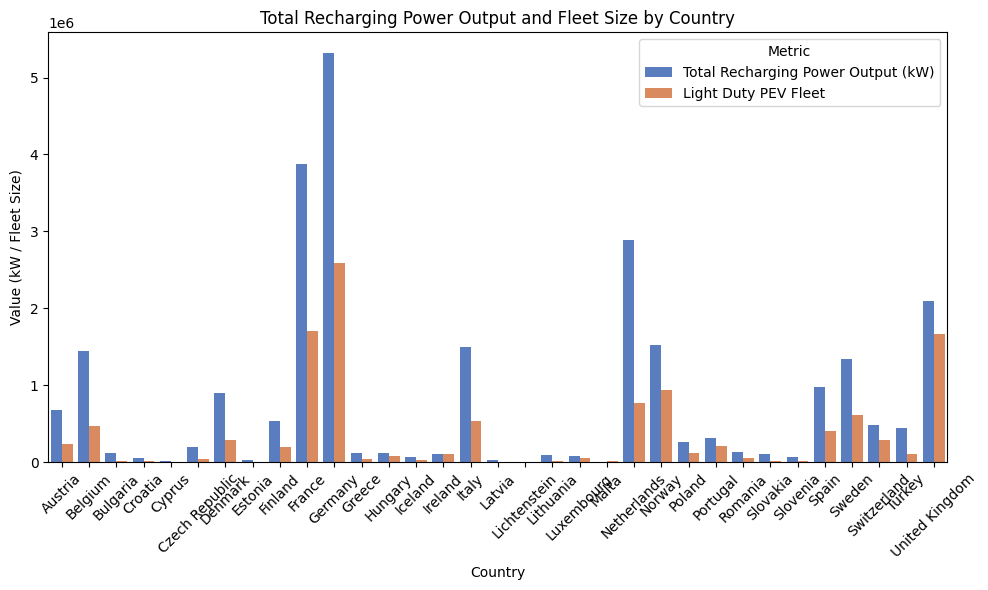

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt



df_melted = pd.melt(df, id_vars=['Country'], 
                    value_vars=['Total Recharging Power Output (kW)', 'Light Duty PEV Fleet'], 
                    var_name='Metric', value_name='Value')


plt.figure(figsize=(10, 6))


sns.barplot(x='Country', y='Value', hue='Metric', data=df_melted, palette='muted')


plt.title('Total Recharging Power Output and Fleet Size by Country')
plt.ylabel('Value (kW / Fleet Size)')
plt.xlabel('Country')
plt.xticks(rotation=45)  
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

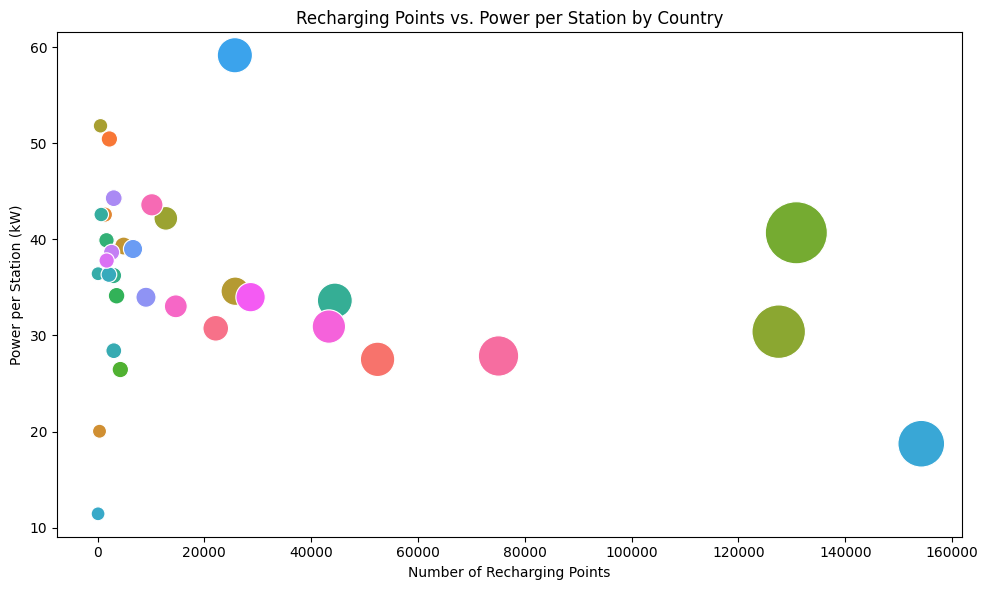

In [203]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create the bubble chart
sns.scatterplot(x='Recharging Points', 
                y='Power per station (kW)', 
                size='Total Recharging Power Output (kW)', 
                hue='Country',  # Optional: color bubbles by country
                data=df, 
                sizes=(100, 2000),  # Adjust bubble size range
                legend=False)

# Customize the plot
plt.title('Recharging Points vs. Power per Station by Country')
plt.xlabel('Number of Recharging Points')
plt.ylabel('Power per Station (kW)')

# Show the plot
plt.tight_layout()
plt.show()

In [199]:
import geopandas as gpd
world = gpd.read_file('data/geodata/ne_110m_admin_0_countries.shp')

In [200]:
europe = world[world['CONTINENT'] == 'Europe']
europe = world[(world['CONTINENT'] == 'Europe') & (world['NAME'] != 'Russia')]

In [201]:
merged = europe.merge(df, how='left', left_on='NAME', right_on='Country')
# filter out all multipolygons
#merged = merged[~merged.geometry.type.isin(['MultiPolygon'])]


In [190]:
from shapely.geometry import Polygon, MultiPolygon
unwanted_coord = (-54.524754197799716, 2.0533891870159806)

# Function to filter out unwanted geometries
def filter_out_unwanted(geometry):


    if isinstance(geometry, MultiPolygon):
        # For a MultiPolygon (collection of Polygons)

        geometry = geometry.geoms[1:]
        for i in geometry.geoms:
            print(i)
    
    return geometry

# Apply the filter to France
if 'France' in merged['Country'].values:
    print('yo')
    france_index = merged[merged['Country'] == 'France'].index[0]
    filtered_geometry = filter_out_unwanted(merged.at[france_index, 'geometry'])
    merged.at[france_index, 'geometry'] = filtered_geometry

yo
POLYGON ((6.186320428094177 49.463802802114515, 6.658229607783568 49.20195831969157, 8.099278598674744 49.01778351500333, 7.593676385131062 48.33301911070372, 7.466759067422231 47.62058197691181, 7.192202182655507 47.44976552997102, 6.736571079138059 47.541801255882845, 6.768713820023606 47.2877082383037, 6.037388950229001 46.725778713561866, 6.022609490593538 46.27298981382047, 6.5000997249704255 46.42967275652944, 6.843592970414505 45.99114655210061, 6.802355177445605 45.70857982032864, 7.096652459347837 45.33309886329589, 6.749955275101655 45.02851797136758, 7.007562290076635 44.25476675066136, 7.549596388386107 44.12790110938481, 7.435184767291872 43.69384491634922, 6.52924523278304 43.128892320318315, 4.556962517931424 43.399650987311595, 3.1004105973526634 43.075200507167054, 2.9859989762584576 42.47301504166986, 1.8267932470871528 42.34338471126569, 0.7015906103638941 42.795734361332606, 0.3380469091905809 42.57954600683955, -1.502770961910528 43.03401439063043, -1.9013512841

MULTIPOLYGON (((-51.65779741067889 4.156232408053029, -52.249337531123956 3.241094468596245, -52.55642473001842 2.504705308437053, -52.939657151894956 2.1248576928756364, -53.41846513529531 2.0533891870159806, -53.554839240113544 2.334896551925951, -53.77852067728892 2.3767027856500818, -54.08806250671725 2.105556545414629, -54.524754197799716 2.3118488631237852, -54.2697051662232 2.7323916691150463, -54.181726040246275 3.1897797713304215, -54.00693050801901 3.6200377465925584, -54.399542202356514 4.212611395683467, -54.47863298197923 4.896755682795586, -53.9580446030709 5.756548163267765, -53.618452928264844 5.6465290389183735, -52.88214128275409 5.409850979021584, -51.8233428615259 4.565768133966131, -51.65779741067889 4.156232408053029)), ((6.186320428094177 49.463802802114515, 6.658229607783568 49.20195831969157, 8.099278598674744 49.01778351500333, 7.593676385131062 48.33301911070372, 7.466759067422231 47.62058197691181, 7.192202182655507 47.44976552997102, 6.736571079138059 47.54

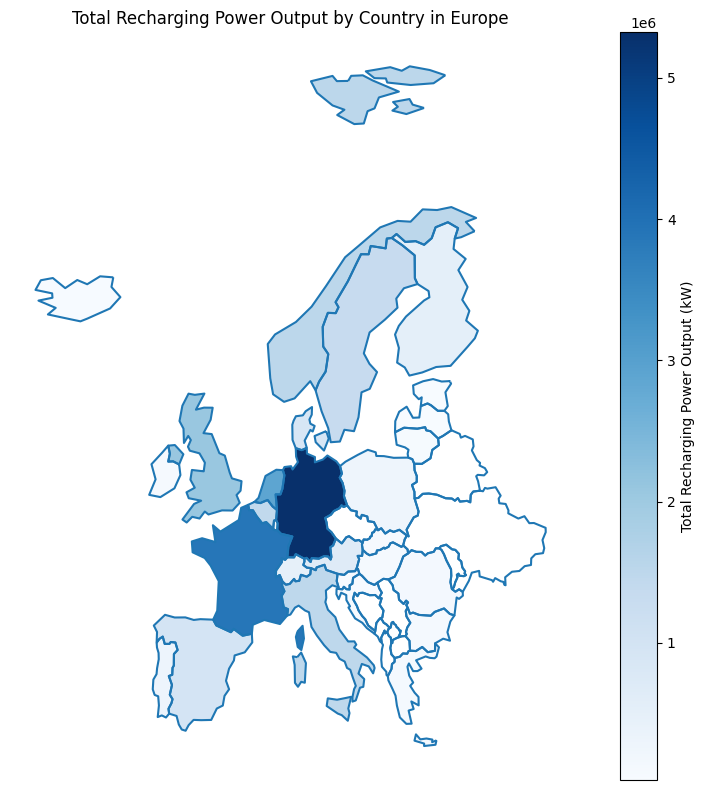

In [202]:
from shapely.geometry import MultiPolygon


def filter_out_unwanted(geometry):
    print(geometry)
    if isinstance(geometry, MultiPolygon):
        geometry = geometry.geoms[1:]
    print(geometry)
    return geometry

if 'France' in merged['Country'].values:
    france_index = merged[merged['Country'] == 'France'].index[0]
    filtered_geometry = filter_out_unwanted(merged.at[france_index, 'geometry'])
    merged.at[france_index, 'geometry'] = filtered_geometry
fig, ax = plt.subplots(1, 1, figsize=(10, 8))


# Plot country borders
merged.boundary.plot(ax=ax)

# Plot countries with the Total Recharging Power Output
merged.plot(column='Total Recharging Power Output (kW)', 
            ax=ax, 
            legend=True,
            cmap='Blues',  # Color map
            legend_kwds={'label': "Total Recharging Power Output (kW)"})

# Customize the map
ax.set_title('Total Recharging Power Output by Country in Europe')
plt.axis('off')  # Turn off axis lines

# Show the plot
plt.tight_layout()
plt.show()